In [1]:
%cd ..

D:\SoftUni\Data Science\Project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [3]:
drugs_disorders_data = pd.read_csv('data/drugs_disorders_by_country.csv')

In [4]:
drugs_disorders_data

,country,mental_disorders_per_100k,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
0,Turkey,15281.0,8.0,4.0,5.0,5.5
1,Cabo Verde,13165.0,4.0,7.0,5.0,4.5
2,South Africa,13825.0,7.5,5.5,3.5,8.5
3,Colombia,13095.0,5.0,9.5,8.0,5.0
4,Peru,15486.0,3.5,9.0,5.5,4.0
...,...,...,...,...,...,...
187,Jamaica,15087.0,3.0,6.0,9.0,3.0
188,St. Vincent and the Grenadines,15380.0,1.0,7.5,7.5,1.0
189,Slovenia,12323.0,4.0,4.5,5.0,5.5
190,St. Lucia,15669.0,1.0,7.0,7.0,1.0


### Correlation matrix

In [65]:
# drugs_disorders_data.corr(numeric_only = True)

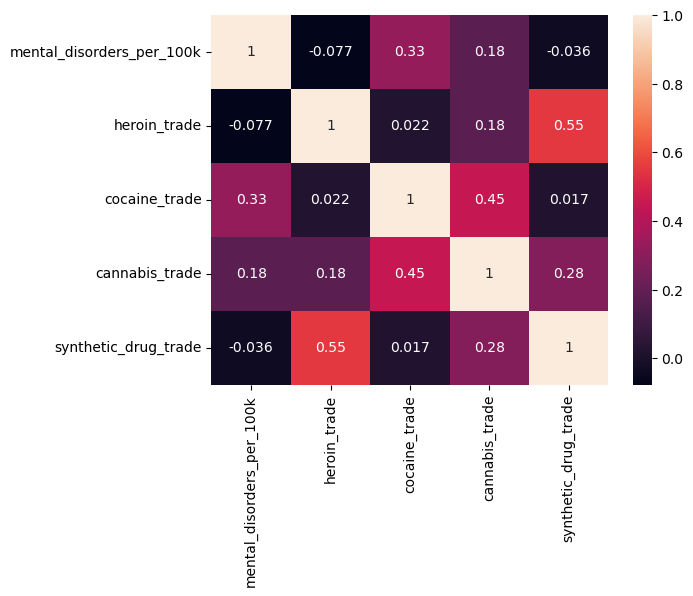

In [69]:
heatmap = sns.heatmap(drugs_disorders_data.corr(method = 'pearson', numeric_only = True), annot = True)

plt.show()

### Descriptive statistics of data

In [36]:
drugs_disorders_data.describe()

,mental_disorders_per_100k,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,14021.901042,3.984375,4.533854,5.109375,4.635417
std,2158.522239,2.061176,2.016334,1.554765,2.053575
min,9705.000000,1.000000,1.000000,1.000000,1.000000
25%,12156.000000,2.000000,3.000000,4.000000,3.000000
50%,13840.500000,4.000000,4.500000,5.000000,4.500000
75%,15508.250000,5.500000,6.000000,6.000000,6.000000
max,19936.000000,9.500000,9.500000,9.000000,9.500000


In [278]:
mental_disorders = drugs_disorders_data['mental_disorders_per_100k']

In [279]:
heroin_trade = drugs_disorders_data['heroin_trade']

In [280]:
cocaine_trade = drugs_disorders_data['cocaine_trade']

In [281]:
cannabis_trade = drugs_disorders_data['cannabis_trade']

In [282]:
synthetic_drug_trade = drugs_disorders_data['synthetic_drug_trade']

### Distributions

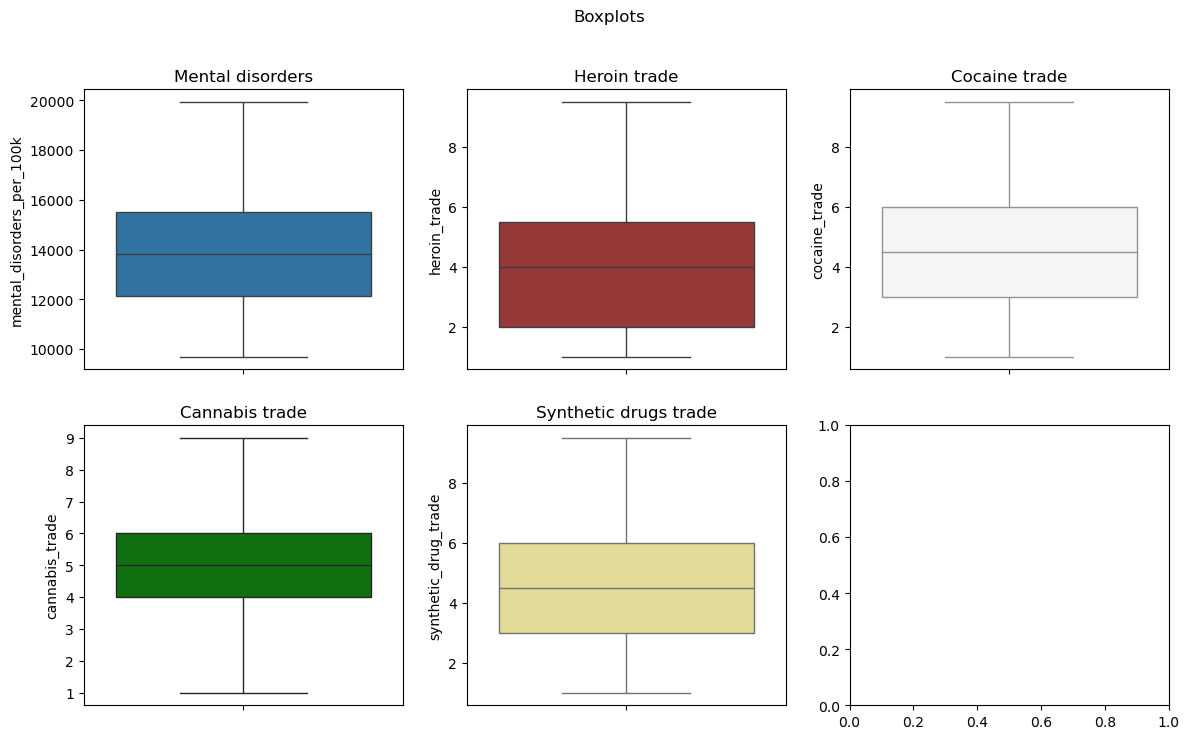

In [319]:
fig, axes = plt.subplots(2, 3, figsize = (14, 8))

sns.boxplot(mental_disorders, ax = axes[0, 0])
sns.boxplot(heroin_trade, ax = axes[0, 1], color = 'brown')
sns.boxplot(cocaine_trade, ax = axes[0, 2], color = 'whitesmoke')
sns.boxplot(cannabis_trade, ax = axes[1, 0], color = 'green')
sns.boxplot(synthetic_drug_trade, ax = axes[1, 1], color = 'khaki')

fig.suptitle('Boxplots')
axes[0, 0].set_title('Mental disorders')
axes[0, 1].set_title('Heroin trade')
axes[0, 2].set_title('Cocaine trade')
axes[1, 0].set_title('Cannabis trade')
axes[1, 1].set_title('Synthetic drugs trade')

plt.show()

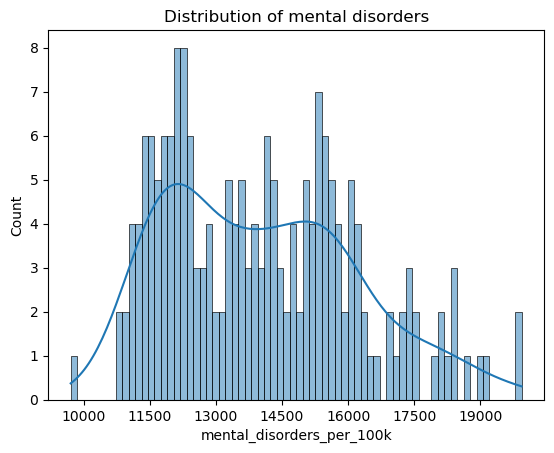

In [71]:
sns.histplot(data = drugs_disorders_data, x = mental_disorders, bins = 70, kde = True)

plt.xticks(np.arange(10000, 20000, 1500))

plt.title('Distribution of mental disorders')
plt.show()

I am interested in observations within the extremes of mental disorders distribution. 15 and 85 percentiles are calculated to filter the dataframe. 

In [188]:
low_high_percentiles_disorders = np.percentile(drugs_disorders_data['mental_disorders_per_100k'], [15, 85])

In [189]:
low_high_percentiles_disorders

array([11714.1, 16188.5])

Taking observations above 85 percentile in separate dataframe for further exploration.

In [190]:
high_disorders_data = drugs_disorders_data[mental_disorders > low_high_percentiles_disorders.max()]

In [191]:
len(high_disorders_data)

29

Taking observations below 15 percentile in separate dataframe for further exploration.

In [192]:
low_disorders_data = drugs_disorders_data[mental_disorders < low_high_percentiles_disorders.min()]

In [193]:
len(low_disorders_data)

29

#### Comparisons within the upper extreme of mental disorders distribution|

In [201]:
high_disorders_data.corr(numeric_only = True)

,mental_disorders_per_100k,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
mental_disorders_per_100k,1.000000,0.447119,0.096158,0.023231,0.267203
heroin_trade,0.447119,1.000000,-0.119191,0.125515,0.517451
cocaine_trade,0.096158,-0.119191,1.000000,0.013286,-0.152512
cannabis_trade,0.023231,0.125515,0.013286,1.000000,0.537414
synthetic_drug_trade,0.267203,0.517451,-0.152512,0.537414,1.000000


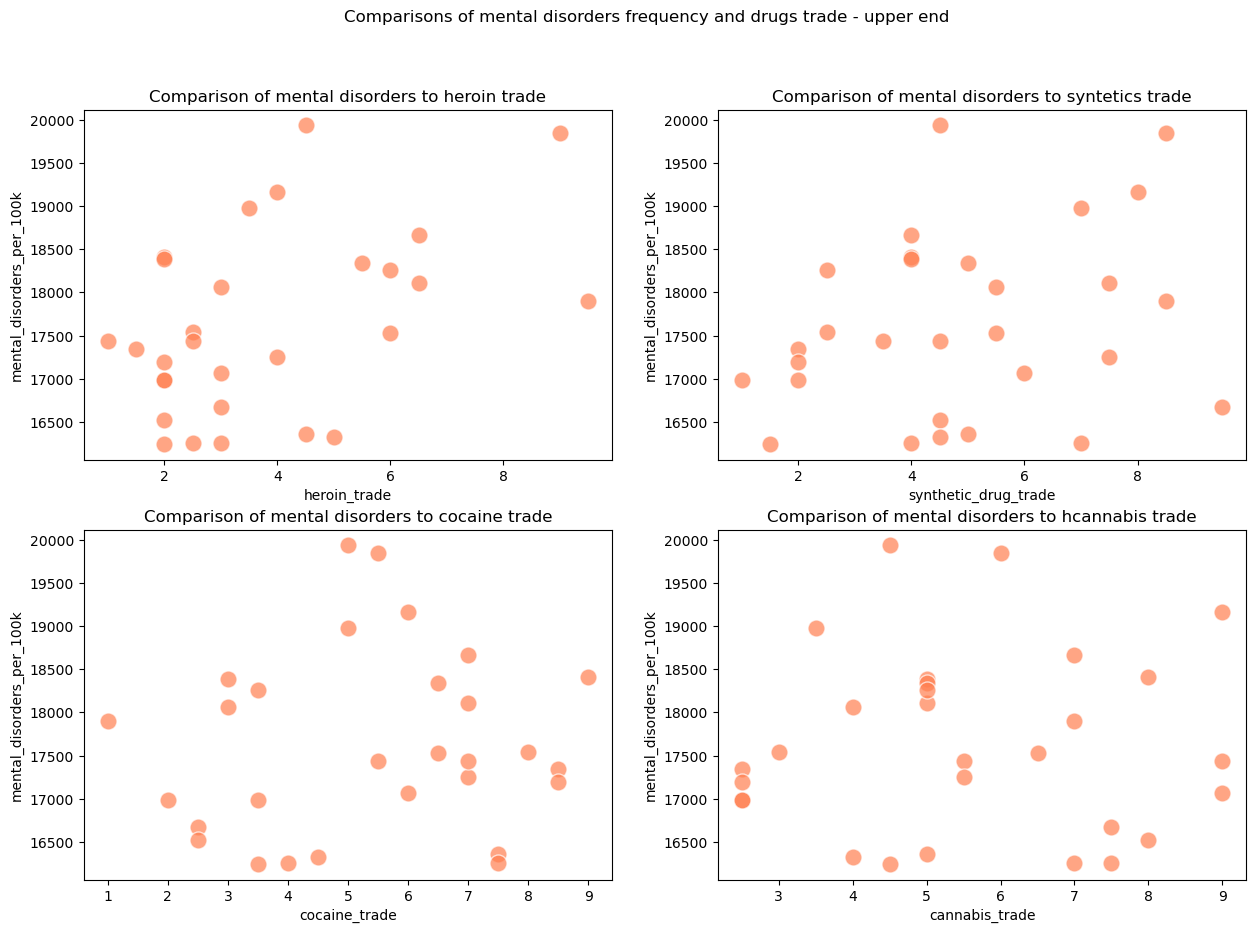

In [266]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.scatterplot(ax = axes[0, 0], data = high_disorders_data, x = 'heroin_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'coral')
sns.scatterplot(ax = axes[0, 1], data = high_disorders_data, x = 'synthetic_drug_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'coral')
sns.scatterplot(ax = axes[1, 0], data = high_disorders_data, x = 'cocaine_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'coral')
sns.scatterplot(ax = axes[1, 1], data = high_disorders_data, x = 'cannabis_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'coral')

fig.suptitle('Comparisons of mental disorders frequency and drugs trade - upper end')
axes[0, 0].set_title('Comparison of mental disorders to heroin trade')
axes[0, 1].set_title('Comparison of mental disorders to syntetics trade')
axes[1, 0].set_title('Comparison of mental disorders to cocaine trade')
axes[1, 1].set_title('Comparison of mental disorders to hcannabis trade')

plt.show()

#### Comparisons within the lower extreme of mental disorders distribution

In [202]:
low_disorders_data.corr(numeric_only = True)

,mental_disorders_per_100k,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
mental_disorders_per_100k,1.000000,-0.256816,0.075257,0.049964,-0.042000
heroin_trade,-0.256816,1.000000,-0.139788,-0.054440,0.250271
cocaine_trade,0.075257,-0.139788,1.000000,0.631269,0.434754
cannabis_trade,0.049964,-0.054440,0.631269,1.000000,0.451120
synthetic_drug_trade,-0.042000,0.250271,0.434754,0.451120,1.000000


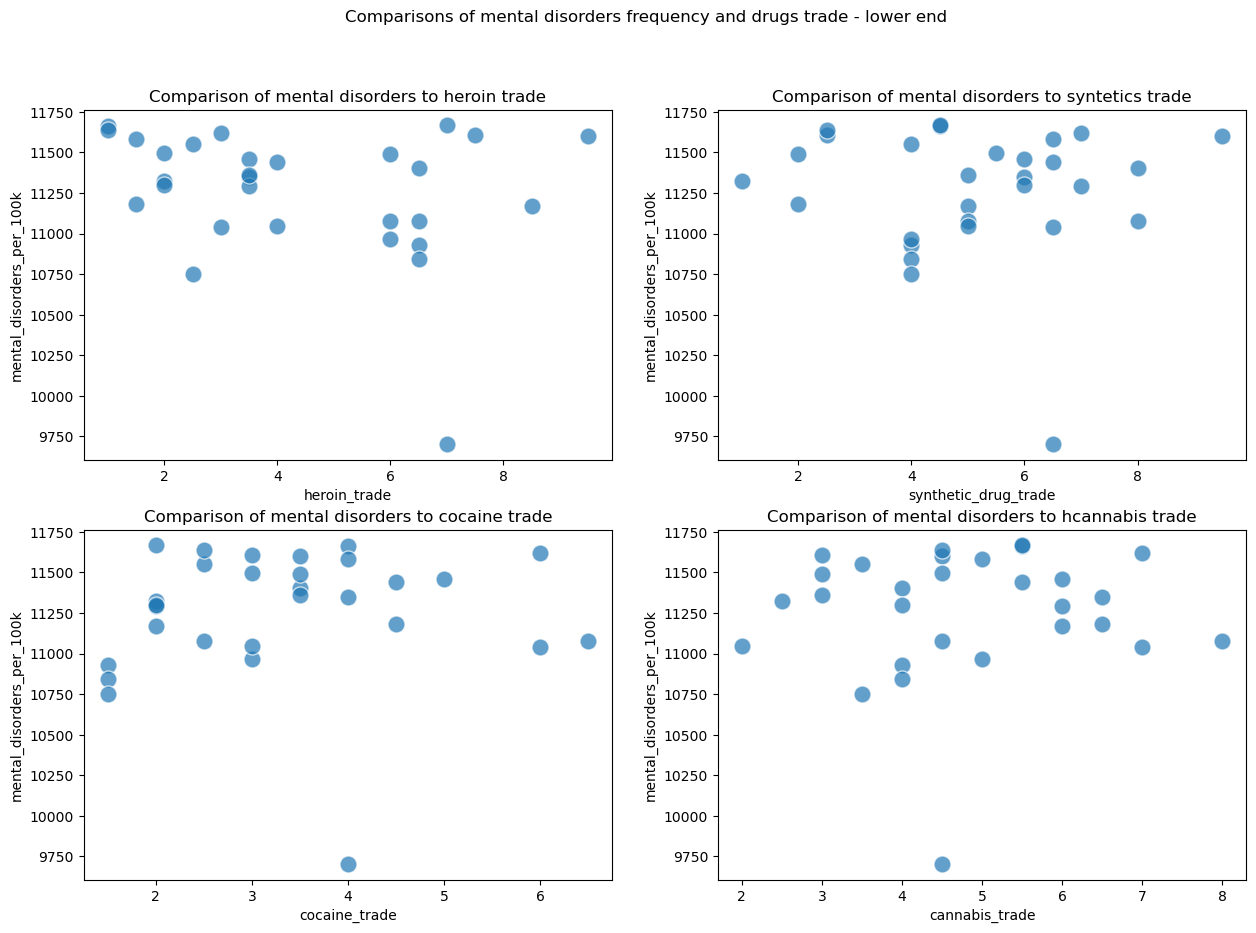

In [265]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.scatterplot(ax = axes[0, 0], data = low_disorders_data, x = 'heroin_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[0, 1], data = low_disorders_data, x = 'synthetic_drug_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[1, 0], data = low_disorders_data, x = 'cocaine_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7)
sns.scatterplot(ax = axes[1, 1], data = low_disorders_data, x = 'cannabis_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7)

fig.suptitle('Comparisons of mental disorders frequency and drugs trade - lower end')
axes[0, 0].set_title('Comparison of mental disorders to heroin trade')
axes[0, 1].set_title('Comparison of mental disorders to syntetics trade')
axes[1, 0].set_title('Comparison of mental disorders to cocaine trade')
axes[1, 1].set_title('Comparison of mental disorders to hcannabis trade')

plt.show()

In [267]:
middle_disorders_data = drugs_disorders_data[(mental_disorders > low_high_percentiles_disorders.min()) & (mental_disorders < low_high_percentiles_disorders.max())]

In [269]:
middle_disorders_data.corr(numeric_only = True)

,mental_disorders_per_100k,heroin_trade,cocaine_trade,cannabis_trade,synthetic_drug_trade
mental_disorders_per_100k,1.000000,-0.103304,0.220355,0.145832,-0.109406
heroin_trade,-0.103304,1.000000,0.126634,0.279066,0.642169
cocaine_trade,0.220355,0.126634,1.000000,0.550710,0.026024
cannabis_trade,0.145832,0.279066,0.550710,1.000000,0.168303
synthetic_drug_trade,-0.109406,0.642169,0.026024,0.168303,1.000000


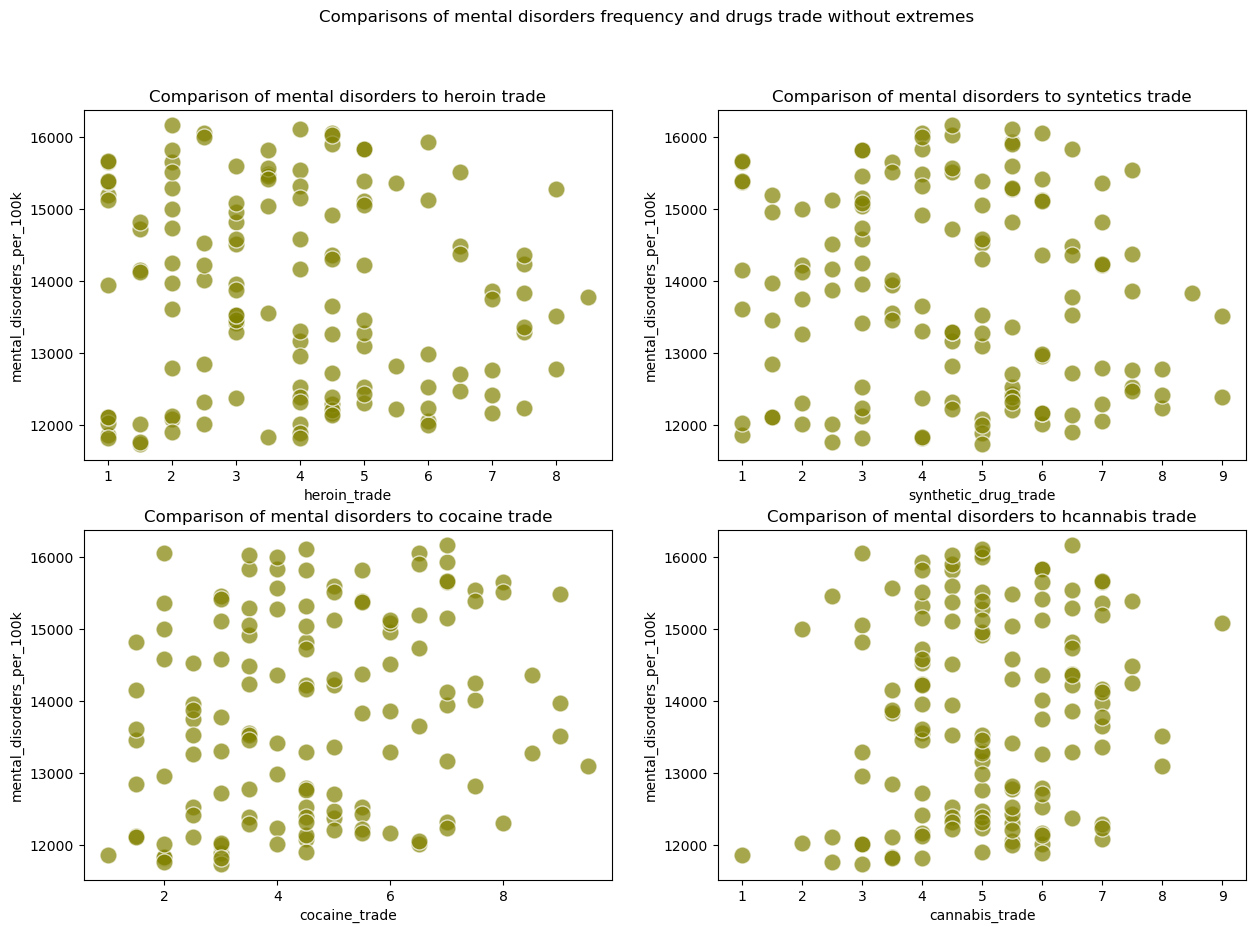

In [270]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.scatterplot(ax = axes[0, 0], data = middle_disorders_data, x = 'heroin_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'olive')
sns.scatterplot(ax = axes[0, 1], data = middle_disorders_data, x = 'synthetic_drug_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'olive')
sns.scatterplot(ax = axes[1, 0], data = middle_disorders_data, x = 'cocaine_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'olive')
sns.scatterplot(ax = axes[1, 1], data = middle_disorders_data, x = 'cannabis_trade', y = 'mental_disorders_per_100k', s = 150, alpha = 0.7, c = 'olive')

fig.suptitle('Comparisons of mental disorders frequency and drugs trade without extremes')
axes[0, 0].set_title('Comparison of mental disorders to heroin trade')
axes[0, 1].set_title('Comparison of mental disorders to syntetics trade')
axes[1, 0].set_title('Comparison of mental disorders to cocaine trade')
axes[1, 1].set_title('Comparison of mental disorders to hcannabis trade')

plt.show()